# Зачётная работа
### **Выполнила**: Корнеева Екатерина Максимовна
### **Группа**: 3822Б1ПР1
### **Вариант**: 34
###**Задача**: цель данной работы заключается в реализации нулевого метода - метода Хука-Дживса для минимизации многомерных функций и проведении экспериментального сравнения его с методами первого порядка - методом градиентного спуска и методом второго порядка - методом Ньютона. 

#### **Импортирование необходимых библиотек для создания графиков и правильной работы программы**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import copy

from scipy import linalg
from scipy.optimize import minimize, rosen, rosen_der, rosen_hess, OptimizeResult
from scipy.linalg import norm

%matplotlib inline

#### **Инициализация переменных**

In [ ]:
initial_point = np.array([4.0,-4.0]) #Начальная точка
path = [initial_point] #Cписок, в котором будут сохраняться координаты точек при каждом шаге оптимизации

min_step_length = 0.000001 #Минимальная длина шага
initial_step_length  = 0.1 #Начальная длина шага 
accuracy = 0.1 #Точность
step_multiplier = 1 #Множитель шага

Для проведения экспериментов была выбрана функция Розенброка, потому что она является сложной для оптимизации и широко используется для тестирования алгоритмов.

#### **Создание функции с экспериментальным решением метода Хука-Дживса через модуль Optimize**

In [ ]:
def Hooke_Jeeves(func, initial_point, min_step_length=0.000001, initial_step_length=0.1, accuracy=0.1, step_multiplier=1, callback=None, **options):
    # Инициализация переменных
    best_x = initial_point
    best_y = func(initial_point)
    func_calls = 1
    num_iter = 0
    improved = True
    stop = False
    
    x = initial_point
    fx = func(x)
    n = len(initial_point)
    
    while True:
        y = x.copy() # x - текущая точка, y - следующая
        
        while True:
            num_iter += 1
            if callback is not None:
                callback(x)

            # Поиск в окрестности
            fy = func(y)
            func_calls += 1
            for j in range(n):
                y[j] += step_multiplier
                f = func(y)
                func_calls += 1
                
                if (f < fy):
                    fy = f
                else:
                    y[j] -= 2 * step_multiplier
                    f = func(y)
                    func_calls += 1
                    
                    if (f < fy):
                        fy = f
                    else:
                        y[j] += step_multiplier
                        
            # Поиск по шаблону
            if fy < fx:
                x, y = y, 2*y - x
                fx = fy
                continue
                
            if linalg.norm(step_multiplier) < min_step_length:
                return OptimizeResult(fun=fx, x=x, nit=num_iter,
                                      nfev=func_calls, success=(num_iter > 1))
            
            step_multiplier /= 2
            break    

def reporter(p):
    global path
    path.append(p)

Функция Hooke_Jeeves реализует метод Хука-Дживса для минимизации многомерных функций, используя модуль Optimize. Она включает инициализацию переменных и цикл оптимизации. Внутри цикла происходит поиск лучшей точки в окрестности текущей точки, а затем происходит поиск по шаблону. Если найденная точка оказывается лучше текущей, она становится текущей, в противном случае длина шага уменьшается.

Метод Хука-Дживса объединяет преимущества методов первого и второго порядка. Он выполняет последовательный спуск по каждой координате и на каждом шаге осуществляет поиск наилучшего направления изменения параметров. Этот метод может быть особенно эффективным для функций с несимметричной геометрией, острыми пиками или локальными минимумами.

Функция Reporter сохраняет координаты точек при каждом шаге оптимизации.

#### **Вызов метода Хука-Дживса с функцией Розенброка через функцию minimize из scipy.optimize:**

In [ ]:
minimize(rosen, initial_point, method=Hooke_Jeeves, callback=reporter)

 success: True
     fun: 3.725291686240695e-09
       x: [ 9.999e-01  9.999e-01]
     nit: 208
    nfev: 954

Функция minimize принимает на вход целевую функцию (rosen), начальную точку (initial_point), метод оптимизации (Hooke_Jeeves) и функцию обратного вызова(reporter). Эта функция применяет выбранный метод оптимизации и итеративно изменяет значения переменных, чтобы в итоге приблизиться к оптимальному решению.

 На выходе вызванной функции мы получеам:
*   success: флаг, указывающий на успешность оптимизации;
*   fun: значение функции в найденном минимуме;
*   x: найденное минимальное значение; 
*   nit: количество итераций, затраченных на оптимизацию.

Решение было получено за 208 итераций.

#### **Далее мы строим график функции Розенброка и график изменения значения функции для рассмотрения хода решения метода Хука-Дживса**

Мы создаем переменные, содержащие координаты для построения графиков, а затем строим график функции Розенброка и график изменения значения функции на каждом шаге оптимизации.

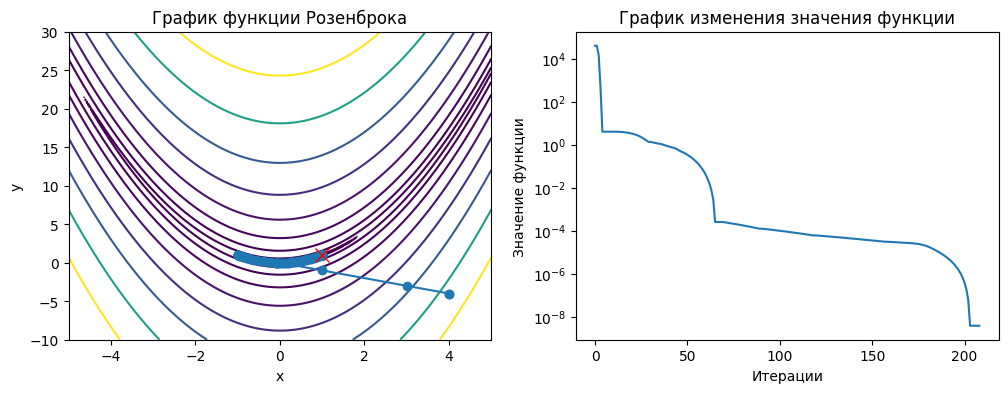

In [ ]:
x = np.linspace(-5, 5, 300)
y = np.linspace(-10, 30, 300)
X, Y = np.meshgrid(x, y)
Z = rosen(np.vstack([X.ravel(), Y.ravel()])).reshape((300,300))
path = np.array(path)

# Построение графиков
fig, axs = plt.subplots(ncols=2, figsize=(12,4))

# Построение графика функции Розенброка
axs[0].contour(X, Y, Z, np.arange(10)**5)
axs[0].plot(path[:, 0], path[:, 1], '-o')
axs[0].plot(1, 1, color='red', marker='x', markersize=10)
axs[0].set_title('График функции Розенброка')
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')

# Построение линейного графика значения функции на каждом шаге оптимизации
axs[1].semilogy(range(len(path)), rosen(path.T))
axs[1].set_title('График изменения значения функции')
axs[1].set_xlabel('Итерации')
axs[1].set_ylabel('Значение функции')

plt.show()

По графику справа можно предположить, что скорость сходимости данной функции является сверхлинейной.

#### **Функция метода градиентого спуска для эксперементального сравнения с методом Хука-Дживса**

In [ ]:
def greedy_minimize(funс, initial_point, args=(), maxfev=None, alpha=0.0001,
        maxiter=100000, min_step_length=1e-10, callback=None, **options):
    bestx = initial_point
    besty = funс(initial_point)
    funcalls = 1
    niter = 0
    improved = True
    stop = False

    while improved and not stop and niter < maxiter:
        niter += 1
        step = alpha * rosen_der(bestx)
        bestx = bestx - step

        besty = funс(bestx)
        funcalls += 1

        if linalg.norm(step) < min_step_length:
            improved = False
        if callback is not None:
            callback(bestx)
        if maxfev is not None and funcalls >= maxfev:
            stop = True
            break

    return OptimizeResult(fun=besty, x=bestx, nit=niter,
                              nfev=funcalls, success=(niter > 1))

Функция greedy_minimize реализует метод градиентного спуска для минимизации функции (func). Градиентный спуск - это итерационный алгоритм оптимизации, который использует градиент (производную) функции для нахождения локального минимума. 
Эта функция использует простую стратегию обновления точки на каждой итерации, двигаясь вдоль градиента с постоянным шагом. Данный метод хорошо подходит для выпуклых функций с гладкими градиентами, где требуется нахождение глобального минимума, однако, такой подход может быть неэффективным для сложных функций с большим количеством локальных минимумов или плато.

#### **Инициализация переменных и вызов функции метода градиентного спуска с функцией Розенброка**

In [ ]:
initial_point = np.array([4.0,-4.0])
path = [initial_point]

minimize(rosen, initial_point, method=greedy_minimize, callback=reporter)

 success: True
     fun: 3.178542782474229e-05
       x: [ 9.944e-01  9.887e-01]
     nit: 100000
    nfev: 100001

Из этих данных видно, что за 100 тысяч итераций этот метод достигает худшей точности, чем метод Хука-Дживса.

####**Построение графиков для рассмотрения хода решения метода градиентного спуска**

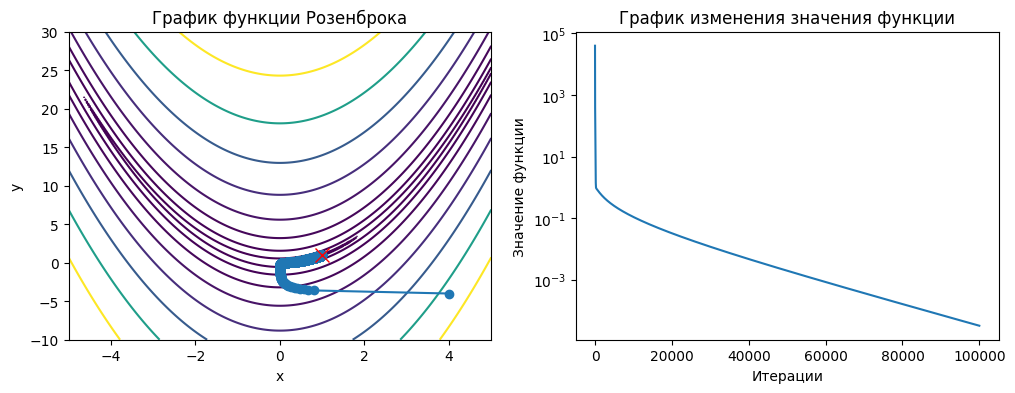

In [ ]:
x = np.linspace(-5, 5, 300)
y = np.linspace(-10, 30, 300)
X, Y = np.meshgrid(x, y)
Z = rosen(np.vstack([X.ravel(), Y.ravel()])).reshape((300,300))
path = np.array(path)

fig, axs = plt.subplots(ncols=2, figsize=(12,4))

axs[0].contour(X, Y, Z, np.arange(10)**5)
axs[0].plot(path[:, 0], path[:, 1], '-o')
axs[0].plot(1, 1, color='red', marker='x', markersize=10)
axs[0].set_title('График функции Розенброка')
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')

axs[1].semilogy(range(len(path)), rosen(path.T))
axs[1].set_title('График изменения значения функции')
axs[1].set_xlabel('Итерации')
axs[1].set_ylabel('Значение функции')

plt.show()

На правом графике можно заметить, что скорость выполнения данного метода является линейной. 

Мы также задаем начальные значения переменных и используем функцию minimize для экспериментального изучения того, как метод Ньютона решает данную задачу.

In [ ]:
initial_point = np.array([4.0,-4.0])
path = [initial_point]

minimize(rosen, initial_point, method='Newton-CG', jac=rosen_der, hess=rosen_hess, callback=reporter)

 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 8.363643402306107e-12
       x: [ 1.000e+00  1.000e+00]
     nit: 26
     jac: [ 9.395e-04 -4.717e-04]
    nfev: 37
    njev: 37
    nhev: 26

Метод Ньютона — это итерационный алгоритм численной оптимизации, используемый для нахождения локального минимума (или максимума) гладкой функции. Он основан на разложении функции в ряд Тейлора и использовании второй производной (гессиана) функции. Данный метод более эффективен в нахождении локальных минимумов и может быстро сходиться при правильном выборе начальной точки. Однако, для больших размерностей или функций с неопределенным гессианом, метод Ньютона может быть вычислительно затратным или приводить к расходимости.

 На выходе вызванной функции мы получеам:

*   message: строка с сообщением об успешном или неудачном завершении оптимизации;
*   jac: значение градиента в точке минимума;
*   nhev: количество вызовов градиента функции Розенброка, которые были сделаны оптимизатором в процессе поиска минимума;
*   nfev, njev: количество вызовов целевой функции Розенброка, которые были сделаны оптимизатором в процессе поиска минимума;

По этим данным видно, что метод Ньютона достиг более высокой точности за 26 итераций, чем градиентный спуск и метод Хука-Дживса за большее количество итераций.

####**Снова рассмотрим графики, чтобы понять ход решения метода Ньютона и сравнить его с предыдущими**

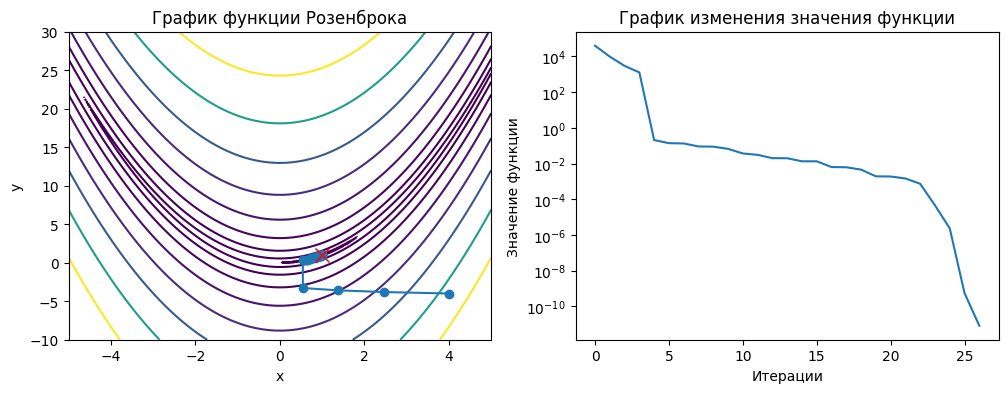

In [ ]:
x = np.linspace(-5, 5, 300)
y = np.linspace(-10, 30, 300)
X, Y = np.meshgrid(x, y)
Z = rosen(np.vstack([X.ravel(), Y.ravel()])).reshape((300,300))
path = np.array(path)

fig, axs = plt.subplots(ncols=2, figsize=(12,4))

axs[0].contour(X, Y, Z, np.arange(10)**5)
axs[0].plot(path[:, 0], path[:, 1], '-o')
axs[0].plot(1, 1, color='red', marker='x', markersize=10)
axs[0].set_title('График функции Розенброка')
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')

axs[1].semilogy(range(len(path)), rosen(path.T))
axs[1].set_title('График изменения значения функции')
axs[1].set_xlabel('Итерации')
axs[1].set_ylabel('Значение функции')

plt.show()

# **Вывод**
В ходе данной работы был реализован метод Хука-Дживса для минимизации многомерных функций. Мы провели экспериментальное сравнение этого метода с методом градиентного спуска и методом Ньютона, чтобы определить их эффективность.

Результаты эксперимента показали, что метод Хука-Дживса занимает промежуточное положение по показателям эффективности. Он показался более эффективным, чем метод градиентного спуска, но не достигал уровня эффективности метода Ньютона. Метод Хука-Дживса потребовал 208 итераций для нахождения решения, в то время как метод Ньютона достиг максимальной точности за 26 итераций, что является наименьшим количеством итераций среди рассмотренных методов.

Таким образом, можно заключить, что в данном контексте метод Ньютона является наиболее эффективным способом минимизации многомерных функций. Он обеспечивает быструю сходимость к точному решению. Однако метод Хука-Дживса представляет промежуточную альтернативу, демонстрируя хорошую эффективность и улучшение по сравнению с методом градиентного спуска.

Важно отметить, что эффективность выбранного метода оптимизации может зависеть от множества факторов, включая форму функции, наличие ограничений, размерность пространства параметров и требуемую точность результата. Поэтому при решении конкретной задачи важно проводить эксперименты и сравнивать различные методы, чтобы выбрать наиболее подходящий вариант для данной функции и контекста.